In [17]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


%matplotlib inline
%config InlineBackend.figure_format='retina'
label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

# plt.rcParams['mathtext.fontset'] = 'cm'
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Palatino"

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
print(os.getenv("PATH"))

/Users/yichen/miniconda3/bin:/Users/yichen/miniconda3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/TeX/texbin:/Library/TeX/texbin:/Library/TeX/texbin:/Library/TeX/texbin


In [18]:
mapping = {
    "lt-at": 0.41,
    "lt-ct": 0.4266666666666667,
    "lt-al": 0.12,
    "lt-ca": 0.06,
    "at-ct": 0.7666666666666667,
    "at-al": 0.21,
    "at-ca": 0.09333333333333334,
}
mapping_sd = {
    "lt-at": 0.028396009109262755,
    "lt-ct": 0.02855533938526046,
    "lt-al": 0.018761663039293715,
    "lt-ca": 0.013711309200802092,
    "at-ct": 0.0244191788620399,
    "at-al": 0.023515952032609696,
    "at-ca": 0.016795061002392163,
}

In [19]:
x_s = []
y_s = [0.309, 0.491, 0.586]
sd_s = []
for s in ['ct', 'al', 'ca']:
    lt_sim = mapping['lt-' + s]
    at_sim = mapping['at-' + s]
    avg_sim = (lt_sim + at_sim) / 2

    lt_sim_var = mapping_sd['lt-' + s] ** 2 
    at_sim_var = mapping_sd['at-' + s] ** 2
    sd_sim = np.sqrt((lt_sim_var + at_sim_var) / 4)
    x_s.append(avg_sim)
    sd_s.append(sd_sim)

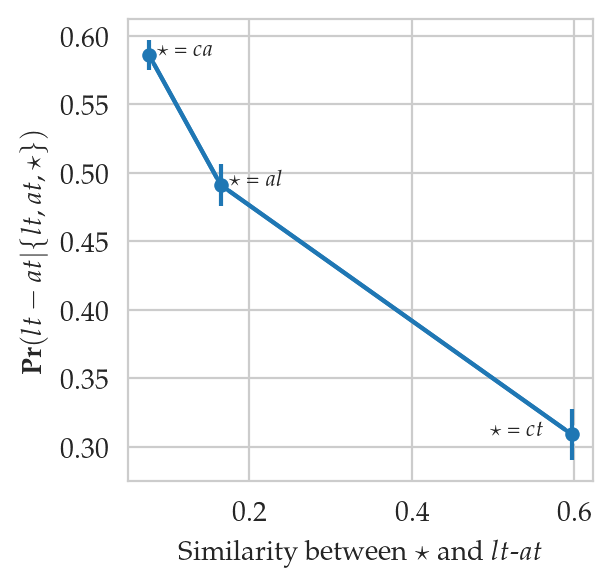

In [20]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.lineplot(x=x_s, y=y_s, marker='o', ax=ax)
ax.errorbar(x=x_s, y=y_s, yerr=sd_s, color='C0')
ax.set_xlabel(r'Similarity between $\star$ and $lt$-$at$')
ax.set_ylabel(r'$\textbf{Pr}(lt-at | \{lt,at,\star\})$')
for i, s in enumerate(['$ct$', '$al$', '$ca$']):
    if i >=1:
        ax.text(x_s[i] + 0.01, y_s[i], r"$\star$ = " + s, fontsize=8)
    else:
        ax.text(x_s[i] - 0.1, y_s[i], r"$\star$ = " + s, fontsize=8)
fig.savefig('plots/similarity_two_row.pdf', bbox_inches='tight')
plt.show()